In [1]:
import numpy as np
from numpy import linalg as LA
import csv
import matplotlib.pyplot as plt

In [2]:
### "X" is Data
### "k" is hyper parameter
### "tau" is Iteration Rate
### "mu" shape (axis=0 is the dimension of data_X, axis=1 is the group_k)

def K_MEAN(X, k, tau, mu =""):
    f = plt.figure()
    
    d_number, n_number = X.shape
    if not(mu):
        mu = np.random.rand(d_number,k) * (np.amax(X, axis = 1)[:, None] - np.amin(X, axis = 1)[:, None])
        + np.amin(X, axis = 1)[:, None]
    mu = np.array(mu)
    plt.plot(mu[0,:], mu[1,:], 'ko', markersize=3.5)
    
    y = np.random.randint(k, size = n_number)
    y = y + 1
    tau = 100
    Loss = 0
      
    for t in range(tau):
        yold = y
        LossOld = Loss
        N = np.ones(k)
        
        ###Update y
        ###Update Loss
        LTLoss = np.empty([k , n_number])
        for j in range(k):
            #LTLoss[j, :] = LA.norm(X - mu[0:-1, j], axis = 0, ord=2)
            stacker = np.zeros(n_number)
            for d in range(d_number):
                stacker += (X[d,:] - mu[d, j])**2
            LTLoss[j, :] = stacker
        Loss = np.sum(np.amin(LTLoss, axis = 0))
        y = np.argmin(LTLoss, axis = 0) + 1
        
        ###Update mu    
        for m in range(k):    
            yBool = (y == (m+1))
            yBoolNew = np.tile(yBool, (d_number, 1))
            index = np.where(yBoolNew)
            colmCount = int(X[index].size / d_number)
            FilteredX = np.reshape(X[index], (d_number, colmCount))
            
            if FilteredX.size == 0:
                ### New Initial "mu" if there is no element found for this group.
                mu[:,m] = np.random.rand(d_number) * (np.amax(X, axis = 1) - np.amin(X, axis = 1))
                + np.amin(X, axis = 1)
            else:
                ### Update "mu" if elements for this group are found.
                dfilt_number, nfilt_number = FilteredX.shape
                N[m] = nfilt_number
                mu[:,m] = np.sum(FilteredX, axis = 1) / N[m]
        
        if (LossOld - Loss)*(LossOld - Loss) < 0.01:
            ylist = np.arange(1,k+1)
            if (all(e in y for e in ylist)):
                print("break")
                break
            
    print(mu)
    print(y)
    for c in range(k):
        colBool = (y == (c+1))
        index = np.where(colBool)
        plt.plot(X[0,:][index], X[1,:][index], 'o', markersize=3, label = str(c))
    plt.plot(mu[0,:], mu[1,:], 'mo', markersize=3.5)
    plt.legend()
    return mu, y

break
[[ 1.8375 11.38   33.    ]
 [21.9625  2.84   43.    ]]
[1 1 1 1 1 1 1 1 2 2 2 2 2 3 3 3 3]


(array([[ 1.8375, 11.38  , 33.    ],
        [21.9625,  2.84  , 43.    ]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3], dtype=int64))

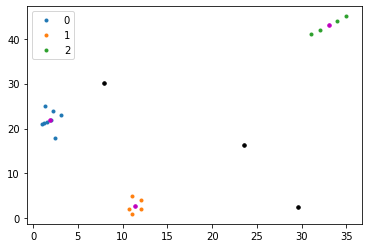

In [3]:
xSample = np.array([[2.2,3.1,1.3,2.4,1,2,1.2,1.5,11,12,11.1,12.1,10.7,31,32,35,34],
                    [24,23,25,18,21,22,21.2,21.5,1,2,5,4, 2.2, 41,42,45,44]])
K_MEAN(xSample, 3, 100)